# EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import numpy as np

plt.rcParams["font.family"] = "AppleGothic"  # Mac용
plt.rcParams["axes.unicode_minus"] = False  # 마이너스 기호 깨짐 방지

# 데이터 로드
train_files = [
    "final_data/final_2020.csv",
    "final_data/final_2021.csv",
    "final_data/final_2022.csv",
    "final_data/final_2023.csv",
]
df_train = pd.concat([pd.read_csv(f) for f in train_files], ignore_index=True)

# datetime 컬럼을 datetime 타입으로 변환
df_train["datetime"] = pd.to_datetime(df_train["datetime"])
df_train["month"] = df_train["datetime"].dt.month
df_train["year"] = df_train["datetime"].dt.year
df_train["season"] = pd.cut(
    df_train["month"], bins=[0, 3, 6, 9, 12], labels=["겨울", "봄", "여름", "가을"]
)

## 강수량 데이터 분석

In [2]:
print("강수량 데이터 기본 정보:")
print(df_train["rain"].describe())
print("\n강수량 결측치 개수:", df_train["rain"].isnull().sum())
print("강수량 결측치 비율: {:.2f}%".format(df_train["rain"].isnull().mean() * 100))

강수량 데이터 기본 정보:
count    325888.000000
mean          1.686738
std           3.847477
min           0.000000
25%           0.000000
50%           0.300000
75%           1.500000
max          92.200000
Name: rain, dtype: float64

강수량 결측치 개수: 3017389
강수량 결측치 비율: 90.25%


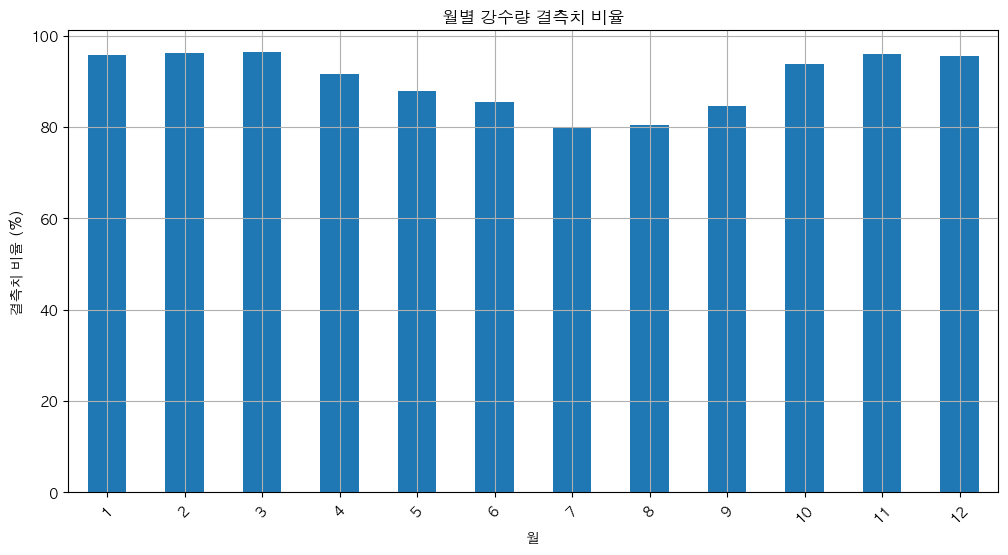

In [3]:
# 1. 강수량 결측치 시각화
plt.figure(figsize=(12, 6))
missing_by_month = df_train.groupby("month")["rain"].apply(
    lambda x: x.isnull().mean() * 100
)
missing_by_month.plot(kind="bar")
plt.title("월별 강수량 결측치 비율")
plt.xlabel("월")
plt.ylabel("결측치 비율 (%)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

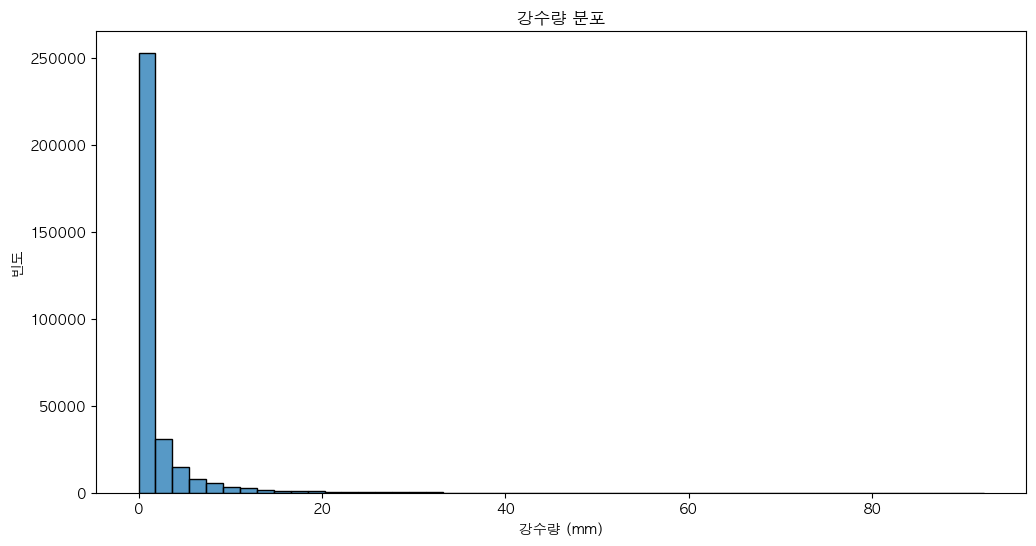

In [4]:
# 2. 강수량 분포도 (히스토그램)
plt.figure(figsize=(12, 6))
sns.histplot(data=df_train, x="rain", bins=50)
plt.title("강수량 분포")
plt.xlabel("강수량 (mm)")
plt.ylabel("빈도")
plt.show()

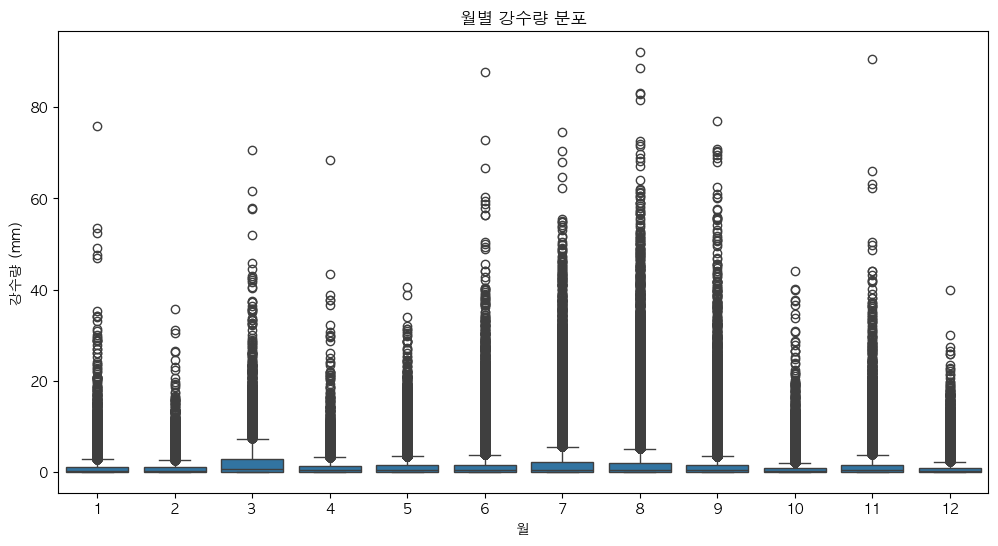

In [5]:
# 3. 강수량 분포도 (박스플롯)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_train, x="month", y="rain")
plt.title("월별 강수량 분포")
plt.xlabel("월")
plt.ylabel("강수량 (mm)")
plt.show()

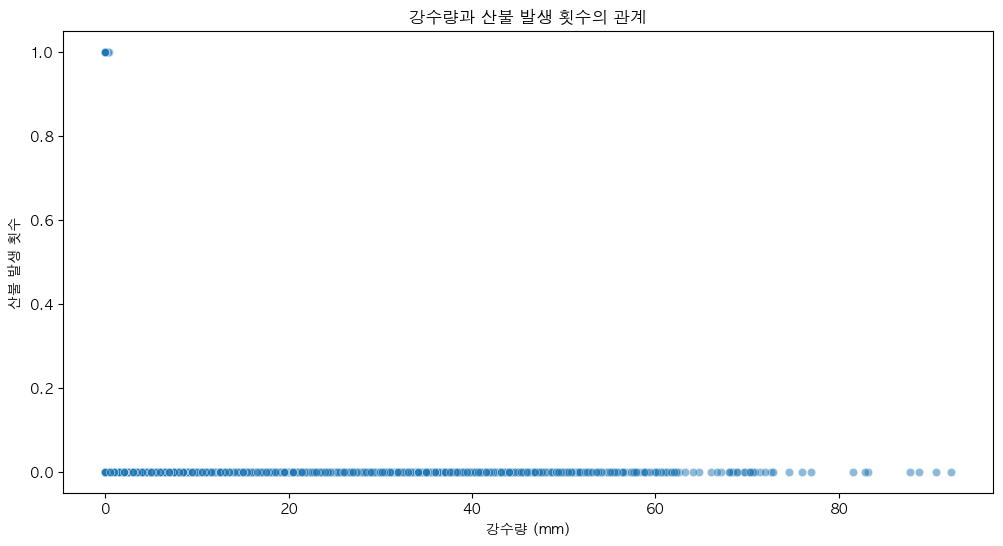

In [6]:
# 4. 강수량과 산불 발생의 관계 (산점도)
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_train, x="rain", y="wildfire_count", alpha=0.5)
plt.title("강수량과 산불 발생 횟수의 관계")
plt.xlabel("강수량 (mm)")
plt.ylabel("산불 발생 횟수")
plt.show()

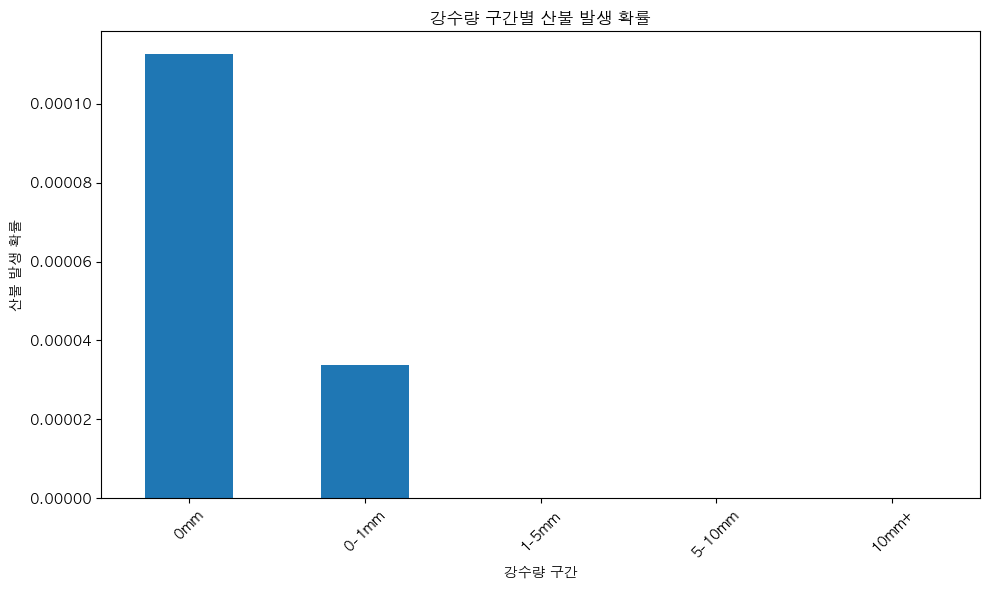

In [7]:
# 5. 강수량 구간별 산불 발생 확률
df_train["rain_category"] = pd.cut(
    df_train["rain"],
    bins=[-float("inf"), 0, 1, 5, 10, float("inf")],
    labels=["0mm", "0-1mm", "1-5mm", "5-10mm", "10mm+"],
)

rain_wildfire_prob = df_train.groupby("rain_category")["wildfire_count"].mean()
plt.figure(figsize=(10, 6))
rain_wildfire_prob.plot(kind="bar")
plt.title("강수량 구간별 산불 발생 확률")
plt.xlabel("강수량 구간")
plt.ylabel("산불 발생 확률")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

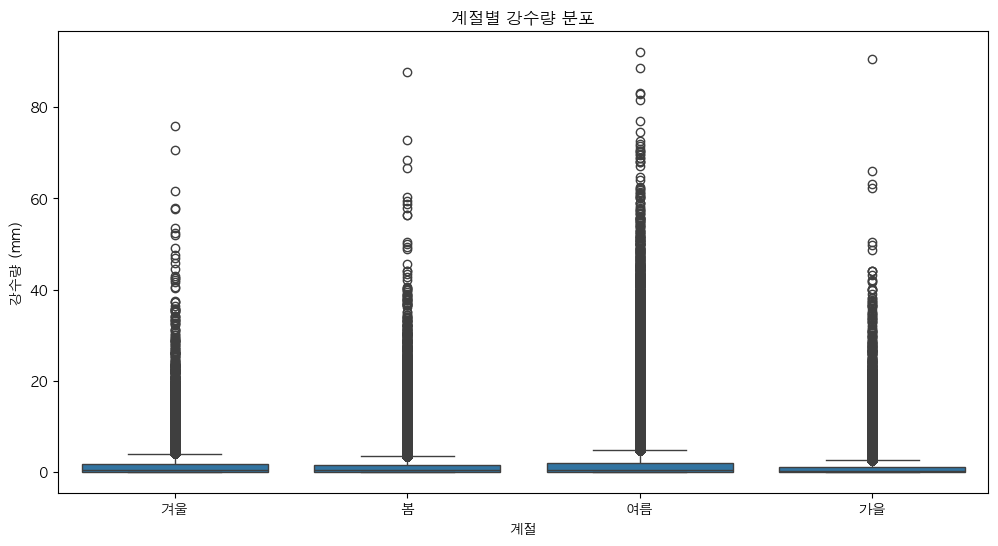

In [8]:
# 6. 계절별 강수량 분포
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_train, x="season", y="rain")
plt.title("계절별 강수량 분포")
plt.xlabel("계절")
plt.ylabel("강수량 (mm)")
plt.show()

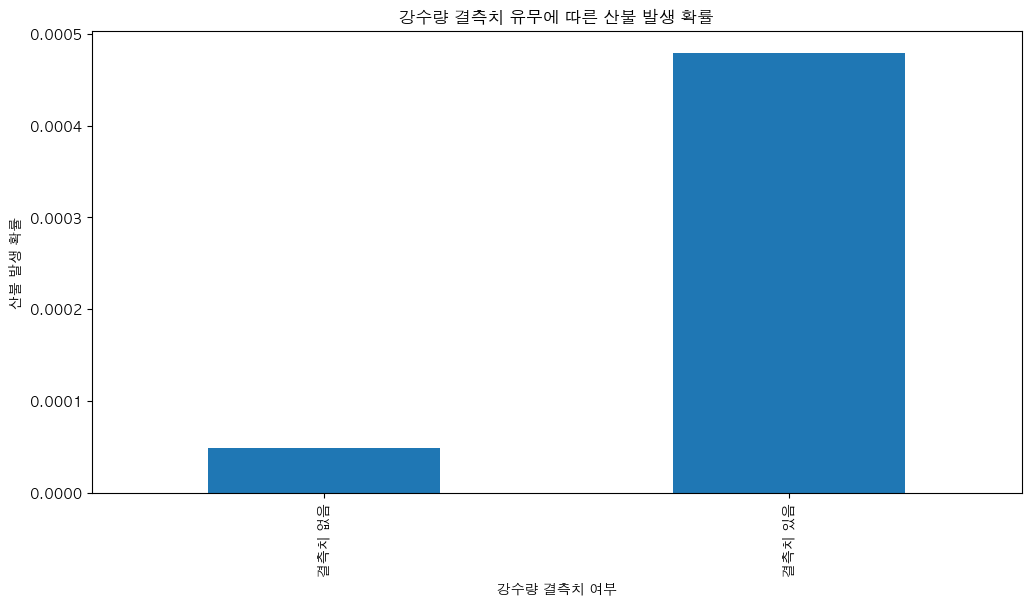

In [9]:
# 7. 강수량 결측치와 산불 발생의 관계
plt.figure(figsize=(12, 6))
missing_wildfire = df_train.groupby(df_train["rain"].isnull())["wildfire_count"].mean()
missing_wildfire.plot(kind="bar")
plt.title("강수량 결측치 유무에 따른 산불 발생 확률")
plt.xlabel("강수량 결측치 여부")
plt.ylabel("산불 발생 확률")
plt.xticks([0, 1], ["결측치 없음", "결측치 있음"])
plt.show()

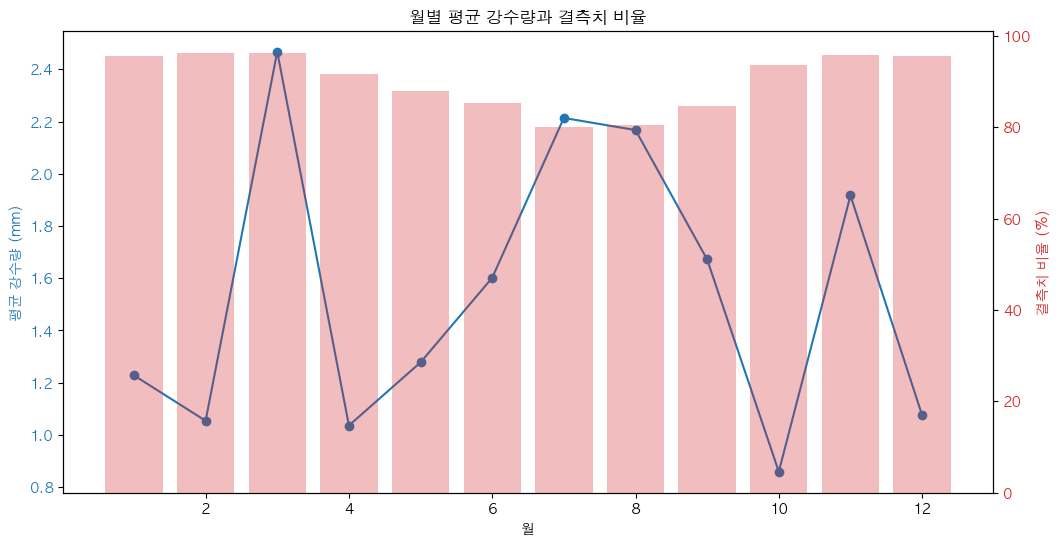

In [10]:
# 8. 월별 강수량 평균과 결측치 비율
monthly_stats = (
    df_train.groupby("month")
    .agg({"rain": ["mean", lambda x: x.isnull().mean() * 100]})
    .reset_index()
)
monthly_stats.columns = ["month", "mean_rain", "missing_ratio"]

fig, ax1 = plt.subplots(figsize=(12, 6))
color = "tab:blue"
ax1.set_xlabel("월")
ax1.set_ylabel("평균 강수량 (mm)", color=color)
ax1.plot(monthly_stats["month"], monthly_stats["mean_rain"], color=color, marker="o")
ax1.tick_params(axis="y", labelcolor=color)

ax2 = ax1.twinx()
color = "tab:red"
ax2.set_ylabel("결측치 비율 (%)", color=color)
ax2.bar(monthly_stats["month"], monthly_stats["missing_ratio"], color=color, alpha=0.3)
ax2.tick_params(axis="y", labelcolor=color)

plt.title("월별 평균 강수량과 결측치 비율")
plt.show()